<h3>다음의 Error를 해결하기 위하여 y_test에 .values.ravel()추가</h3>
<h4>
[Error]
DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
return self._fit(X, y)
</h4>
<a href="https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected">참고 링크</a>

<h1>hw_1 - (1)</h1>
<h3>data와 labels 열 개만 출력해서 실제 값을 확인하세요</h3>
<h4>(랜덤한 10가지의 data와 labels 출력)</h4>

In [47]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer_data = load_breast_cancer()

df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [48]:
## data | labels
df_data.sample(n = 10)
df_labels.sample(n = 10)

,0
333,1
462,1
294,1
188,1
434,1
536,0
388,1
28,0
36,0
72,0


<h4>각 label이 의미하는 것 확인</h4>

In [49]:
print(breast_cancer_data.target_names)

## malignant = 0, benign = 1

['malignant' 'benign']


<h1>hw_1 - (2)</h1>
<h3>X_train, y_train, X_test, y_test로 훈련과 테스트 데이터를 8:2로 나누기</h3>

In [50]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=6)

print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape :", X_test.shape)

print("y_test.shape :", y_train.shape)

X_train.shape : (455, 30)
y_train.shape : (455, 1)
X_test.shape : (114, 30)
y_test.shape : (455, 1)


<h1>hw_1 - (3)</h1>
<h3>KNN 알고리즘 모델 만들기, K 값은 3을 사용</h3>
<!-- KNN 모델 훈련 -->

In [51]:
from sklearn.neighbors import KNeighborsClassifier

## n_neighbors == k
mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, y_train.values.ravel())

# 예측
prediction = mymodel.predict(X_test)

mymodel.score(X_test, y_test)

print(mymodel.score(X_test, y_test))

0.9385964912280702


<h1>시드 값 찾기</h1>
<h3>원하는 결괏값을 도출해 내는 random_state 값 찾기</h3>

In [52]:
# <무한 범위>
## def infinite() :
##     value = 0    
##     while True :
##         yield value        
##         value += 1
        
# <50까지의 범위로 실습> 
def find_random_state() :
    target_score = 0.9385964912280702
    
    for random_state in range(50):
        X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=random_state)
        
        mymodel = KNeighborsClassifier(n_neighbors=3)
        mymodel.fit(X_train, y_train.values.ravel())
        
        score = mymodel.score(X_test, y_test)
        
        if (round(score, 16) == target_score) :
            target_random_state = random_state
            return target_random_state
            break
            
        else :
            continue

print(find_random_state())
## print(find_random_state()) <-- 도출된 random_state값 확인 가능

6


<h1>전체 코드</h1>

In [53]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def find_random_state() :
    target_score = 0.9385964912280702
    
    for random_state in range(50):
        X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=random_state)
        
        mymodel = KNeighborsClassifier(n_neighbors=3)
        mymodel.fit(X_train, y_train.values.ravel())
        
        score = mymodel.score(X_test, y_test)
        
        if (round(score, 16) == target_score) :
            target_random_state = random_state
            return target_random_state
            break
            
        else :
            continue
        
breast_cancer_data = load_breast_cancer()

df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

df_data.sample(n = 10)
df_labels.sample(n = 10)

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=find_random_state())

print("X_train.shape :", X_train.shape)
print("y_train.shape :", y_train.shape)
print("X_test.shape :", X_test.shape)
print("y_test.shape :", y_test.shape)

mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, y_train.values.ravel())

# 예측
prediction = mymodel.predict(X_test)

print(mymodel.score(X_test, y_test))

X_train.shape : (455, 30)
y_train.shape : (455, 1)
X_test.shape : (114, 30)
y_test.shape : (114, 1)
0.9385964912280702


<h1>hw_2</h2>
<h3>Accuracy 증가시키기 (1)</h3>

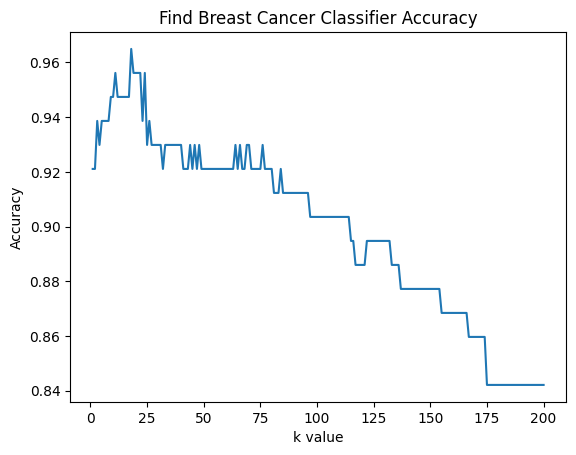

In [54]:
import matplotlib.pyplot as plt

k_range = range(1, 201)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Breast Cancer Classifier Accuracy")
plt.show()

<h3>도출된 결과에 대한 검증</h3>

<h4>정확도가 최대가 되는 순간 찾기</h4>

In [55]:
import numpy as np

max_accuracy = np.max(find_accuracy)
max_index = find_accuracy.index(max_accuracy)
max_k = k_range[max_index]

print(max_k)

18


<h4>검증 (k == 18에서 가장 높은 정확성을 가짐)</h4>

In [56]:
## 유의미한 0 ~ 25 구간에서의 검증
for find_k in range(1, 26) :
    advanced_mymodel = KNeighborsClassifier(n_neighbors=find_k)
    advanced_mymodel.fit(X_train, y_train.values.ravel())

    accuracy_result = advanced_mymodel.score(X_test, y_test)
    
    print("[%d] : " % find_k, accuracy_result)

[1] :  0.9210526315789473
[2] :  0.9210526315789473
[3] :  0.9385964912280702
[4] :  0.9298245614035088
[5] :  0.9385964912280702
[6] :  0.9385964912280702
[7] :  0.9385964912280702
[8] :  0.9385964912280702
[9] :  0.9473684210526315
[10] :  0.9473684210526315
[11] :  0.956140350877193
[12] :  0.9473684210526315
[13] :  0.9473684210526315
[14] :  0.9473684210526315
[15] :  0.9473684210526315
[16] :  0.9473684210526315
[17] :  0.9473684210526315
[18] :  0.9649122807017544
[19] :  0.956140350877193
[20] :  0.956140350877193
[21] :  0.956140350877193
[22] :  0.956140350877193
[23] :  0.9385964912280702
[24] :  0.956140350877193
[25] :  0.9298245614035088


<h3>Accuracy 증가시키기 (2)</h3>

<h4>데이터의 전처리(min-max-normalization)</h4>
<a href="https://hanstar4.tistory.com/17">참고 링크</a>

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=6)

<h5>min-max-normalization</h5>

In [58]:
min_X_train = X_train.min(axis=0)
max_X_train = X_train.max(axis=0)
scaled_X_train = (X_train - min_X_train) / (max_X_train - min_X_train)

print(scaled_X_train.shape)

(455, 30)


In [59]:
min_X_test = X_test.min(axis=0)
max_X_test = X_test.max(axis=0)
scaled_X_test = (X_test - min_X_test) / (max_X_test - min_X_test)

print(scaled_X_test.shape)

(114, 30)


<h5>데이터의 전처리 이후 도출된 정확도</h5>

In [60]:
scaled_model = KNeighborsClassifier(n_neighbors=3)
scaled_model.fit(scaled_X_train, y_train.values.ravel())
prediction = scaled_model.predict(scaled_X_test)

scaled_accuracy = scaled_model.score(scaled_X_test, y_test)

print(scaled_accuracy)

0.9122807017543859


<h4>데이터의 전처리(z-score-normalization)</h4>

<a href="https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%EC%A0%90%EC%88%98">참고 링크(1)</a>
<a href="https://rebro.kr/183">참고 링크 (2)</a>

<h5>평균 및 표준편차 계산</h5>

In [65]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

<h5>z-score-normalization</h5>

In [68]:
z_scaled_X_train = (X_train - mean) / std
z_scaled_X_test = (X_test - mean) / std

<h5>데이터의 전처리 이후 도출된 정확도</h5>

In [69]:
z_scaled_model = KNeighborsClassifier(n_neighbors=3)
z_scaled_model.fit(z_scaled_X_train, y_train.values.ravel())
prediction = z_scaled_model.predict(z_scaled_X_test)

z_scaled_accuracy = z_scaled_model.score(z_scaled_X_test, y_test)

print(z_scaled_accuracy)

0.9649122807017544
